In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

2024-07-22 11:11:29.844306: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 11:11:29.844458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 11:11:30.109120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
# Label names for CIFAR-100
fine_labels = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

coarse_labels = [
    "aquatic mammals", "fish", "flowers", "food containers", "fruit and vegetables", "household electrical devices",
    "household furniture", "insects", "large carnivores", "large man-made outdoor things", "large natural outdoor scenes",
    "large omnivores and herbivores", "medium-sized mammals", "non-insect invertebrates", "people", "reptiles", "small mammals",
    "trees", "vehicles 1", "vehicles 2"
]


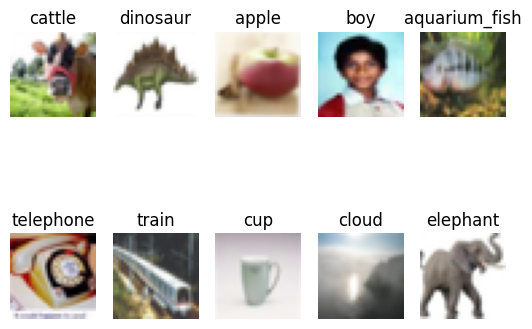

In [4]:
import matplotlib.pyplot as plt

# Display the first 10 images from the training set
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(fine_labels[y_train[i][0]])
    plt.axis('off')
plt.show()


In [5]:
# Check the shape of a single image
single_image_shape = x_train[0].shape
print(f"Single image shape: {single_image_shape}")  # (32, 32, 3)

Single image shape: (32, 32, 3)


In [6]:
# CNN model for CIFAR 100 data
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    
    layers.Dense(100, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,708 (674.64 KB)

 Trainable params: 172,260 (672.89 KB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
  45/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0155 - loss: 5.5555    

I0000 00:00:1721646725.265764     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721646725.289367     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0586 - loss: 4.5535

W0000 00:00:1721646735.144655     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.0586 - loss: 4.5533 - val_accuracy: 0.1344 - val_loss: 3.8503
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1532 - loss: 3.6803 - val_accuracy: 0.2459 - val_loss: 3.2321
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2089 - loss: 3.3422 - val_accuracy: 0.3008 - val_loss: 2.8904
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2595 - loss: 3.0927 - val_accuracy: 0.3007 - val_loss: 2.9310
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2882 - loss: 2.9467 - val_accuracy: 0.3304 - val_loss: 2.7799
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3054 - loss: 2.8358 - val_accuracy: 0.3740 - val_loss: 2.5986
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3302 - loss: 2.7386 - val_accuracy: 0.3400 - val_loss: 2.7484
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3431 - loss: 2.6797 - val_accura

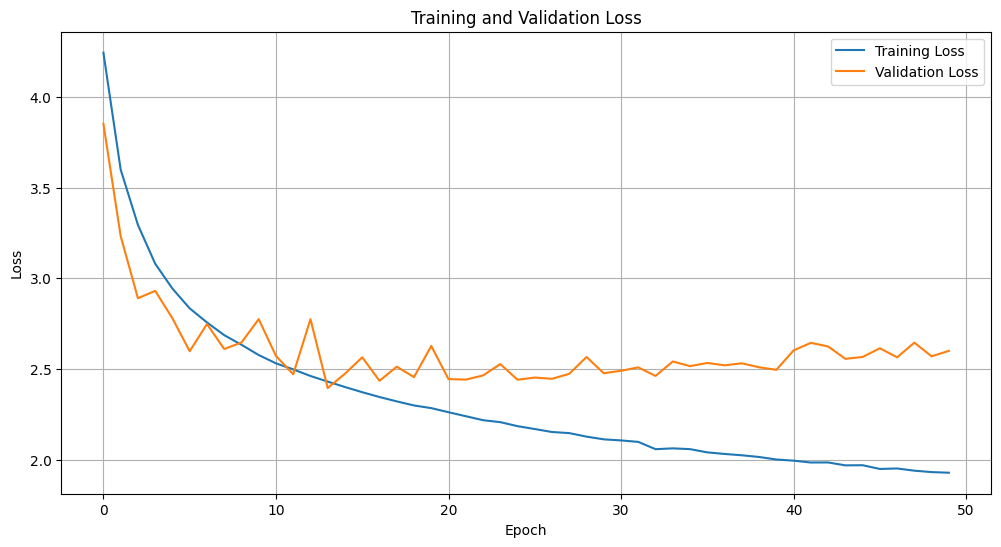

In [8]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4172 - loss: 2.5861
Test accuracy: 0.41429999470710754


In [10]:
# Make predictions
predictions = model.predict(x_test)

100/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1721646968.085306     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
predictions

array([[3.8213415e-08, 2.3432007e-05, 6.1333814e-04, ..., 5.5505466e-06,
        2.6316600e-04, 9.6645430e-02],
       [4.5431298e-05, 7.5344701e-04, 2.8815705e-04, ..., 3.9178181e-02,
        1.6032820e-04, 9.5024426e-04],
       [2.7753340e-09, 2.5466006e-04, 2.1053913e-04, ..., 7.2205275e-02,
        8.2861356e-05, 1.1912241e-04],
       ...,
       [5.1805475e-08, 1.5186074e-05, 4.8506212e-05, ..., 2.7973801e-03,
        1.1057945e-04, 8.1671355e-03],
       [1.1969059e-10, 4.7925168e-06, 1.3584159e-04, ..., 1.1939651e-02,
        3.0906597e-06, 2.3898021e-04],
       [6.9461080e-08, 2.0358265e-04, 1.6859079e-06, ..., 8.8406543e-10,
        5.6889082e-08, 5.0659182e-06]], dtype=float32)

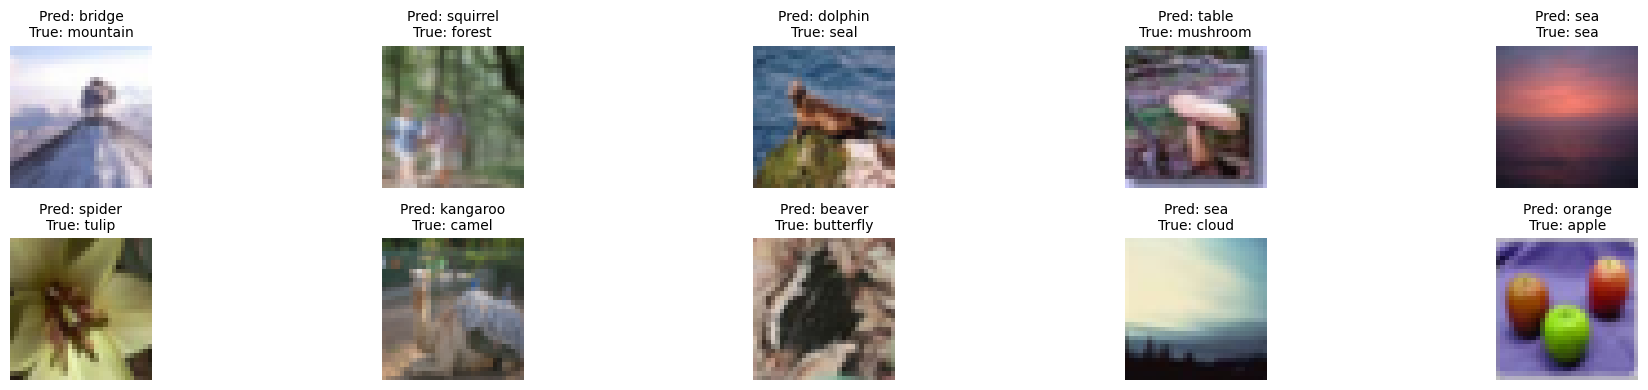

In [12]:
# Define the number of images to plot
num_images = 10

plt.figure(figsize=(20, 4))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    pred_label = int(np.argmax(predictions[i]))
    true_label = y_test[i][0]
    plt.title(f'Pred: {fine_labels[pred_label]}\nTrue: {fine_labels[true_label]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()